In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import cv2

- Lectura de Datos CSV.

In [78]:
train_labels = pd.read_csv('./data/train_data.csv')
test_labels = pd.read_csv('./data/test_data.csv')

In [79]:
train_labels.dtypes

id         int64
boneage    int64
male        bool
dtype: object

In [80]:
train_labels['id'].count()

12611

In [81]:
test_labels.dtypes

Case ID     int64
Sex        object
dtype: object

In [82]:
test_labels['Case ID'].count()

200

# Histogramas

### Edad de huesos

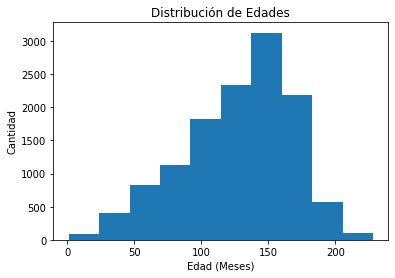

In [83]:
fig, ax = plt.subplots()
plt.hist(train_labels['boneage'])
ax.set_title('Distribución de Edades')
ax.set_xlabel('Edad (Meses)')
ax.set_ylabel('Cantidad')
ax.grid(False)
plt.show()

### Sexo

In [88]:
male2=[]
for i in train_labels['male']:
    if i==True:
        male2.append("M")
    else:
        male2.append("F")   

In [89]:
train_labels['male2']=male2

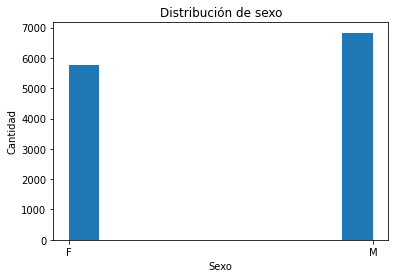

In [91]:
fig, ax = plt.subplots()
plt.hist(train_labels['male2'])
ax.set_title('Distribución de sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad')
ax.grid(False)
plt.show()

# Tablas de frecuencia

### Tabla de sexos

In [72]:
pd.value_counts(train_labels['male'])

True     6833
False    5778
Name: male, dtype: int64

In [92]:
pd.value_counts(train_labels['male2'])

M    6833
F    5778
Name: male2, dtype: int64

### Tabla de edad de huesos

In [73]:
pd.value_counts(train_labels['boneage'])

156    1113
132    1084
120     992
168     892
162     682
       ... 
117       1
133       1
129       1
107       1
20        1
Name: boneage, Length: 160, dtype: int64

# Estadistica Descriptiva

### Descripcion de edad de huesos

In [93]:
train_labels["boneage"].describe()

count    12611.000000
mean       127.320752
std         41.182021
min          1.000000
25%         96.000000
50%        132.000000
75%        156.000000
max        228.000000
Name: boneage, dtype: float64

### Correlacion

In [75]:
train_labels.corr()

,id,boneage,male
id,1.000000,-0.023748,-0.012104
boneage,-0.023748,1.000000,0.210809
male,-0.012104,0.210809,1.000000
